In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [9]:
# Load datasets
train_data = pd.read_csv('bank-full_train.csv')
test_data = pd.read_csv('bank-full_test.csv')

Checking data type for train_data:
<class 'pandas.core.frame.DataFrame'>


C:\Users\vpark\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


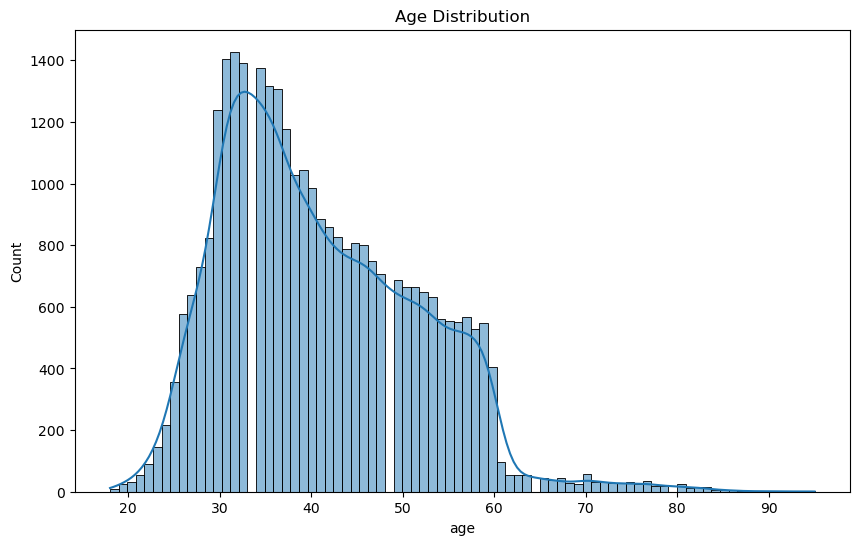

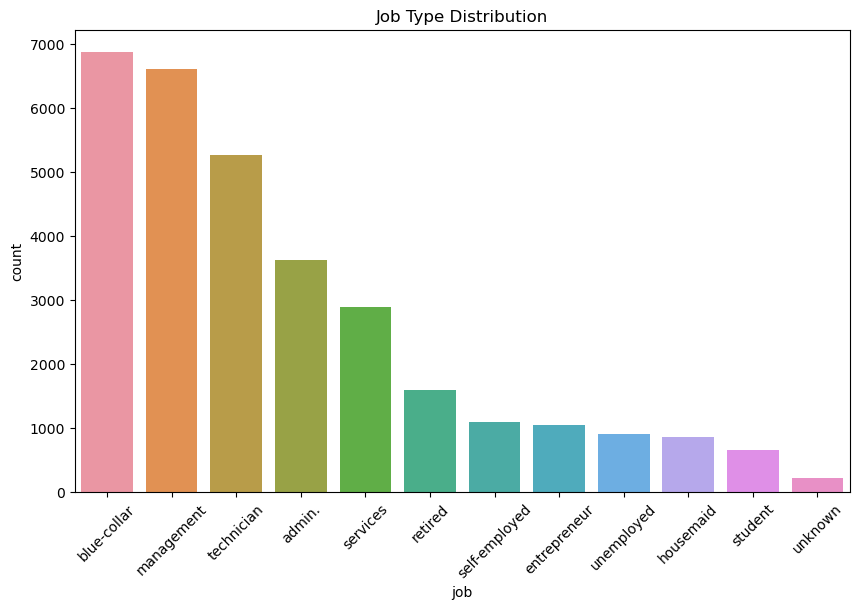

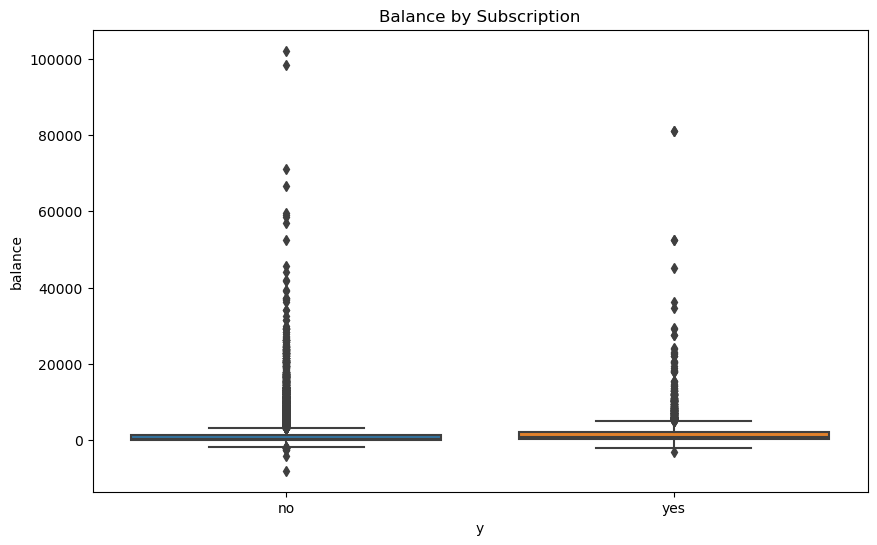

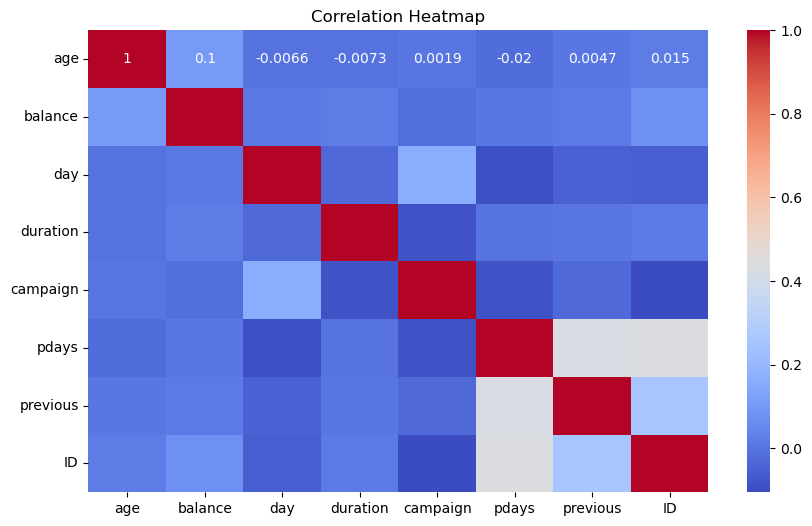

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# EDA - Exploratory Data Analysis
# EDA - Exploratory Data Analysis
def eda_visualizations(data):
    # Handle missing and invalid data
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)  # Drop rows with NaN values

    # Age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data['age'], kde=True)
    plt.title("Age Distribution")
    plt.savefig('eda_age_distribution.png')

    # Job distribution
    if 'job' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x='job', data=data, order=data['job'].value_counts().index)
        plt.xticks(rotation=45)
        plt.title("Job Type Distribution")
        plt.savefig('eda_job_distribution.png')

    # Balance by subscription
    if 'y' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='y', y='balance', data=data)
        plt.title("Balance by Subscription")
        plt.savefig('eda_balance_by_subscription.png')
    
    # Correlation heatmap
    numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
    if numeric_data.shape[1] > 1:  # Check if there are enough numeric columns
        plt.figure(figsize=(10, 6))
        corr = numeric_data.corr()  # Compute correlation on numeric data only
        sns.heatmap(corr, annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.savefig('eda_correlation_heatmap.png')
    else:
        print("Not enough numeric columns for correlation heatmap.")

# Preprocess data
def preprocess_data(data, is_train=True):
    # Handle missing and invalid data
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)

    # Encode categorical columns
    label_encoder = LabelEncoder()
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
    for col in categorical_cols:
        if col in data.columns:
            data[col] = label_encoder.fit_transform(data[col])
    
    # Encode target column (only for training data)
    if 'y' in data.columns:
        data['y'] = label_encoder.fit_transform(data['y'])
    
    # Separate features and target
    features = data.drop(columns=['y', 'ID']) if is_train else data.drop(columns=['ID'])
    
    # Scale numeric features
    scaler = StandardScaler()
    features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    
    return features, data['y'] if 'y' in data.columns else None

# Apply EDA and Preprocessing
print("Checking data type for train_data:")
print(type(train_data))  # Debugging step to ensure train_data is a DataFrame

eda_visualizations(train_data)

X_train, y_train = preprocess_data(train_data)
X_test, _ = preprocess_data(test_data, is_train=False)


C:\Users\vpark\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8455 - loss: 0.3551 - val_accuracy: 0.8973 - val_loss: 0.2434
Epoch 2/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8991 - loss: 0.2359 - val_accuracy: 0.8962 - val_loss: 0.2348
Epoch 3/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8998 - loss: 0.2311 - val_accuracy: 0.8987 - val_loss: 0.2322
Epoch 4/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9041 - loss: 0.2262 - val_accuracy: 0.8967 - val_loss: 0.2308
Epoch 5/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9040 - loss: 0.2190 - val_accuracy: 0.8979 - val_loss: 0.2297
Epoch 6/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9044 - loss: 0.2230 - val_accuracy: 0.9005 - val_loss: 0.2327
Epoch 7/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9037 - loss: 0.2230 - val_accuracy: 0.8972 - val_loss: 0.2269
Epoch 8/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9079 - loss: 0.2188 - val_accuracy: 0.

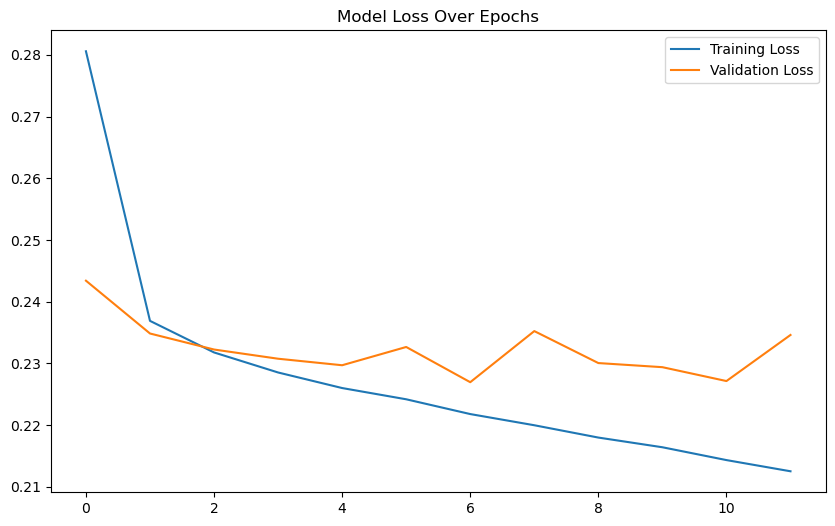

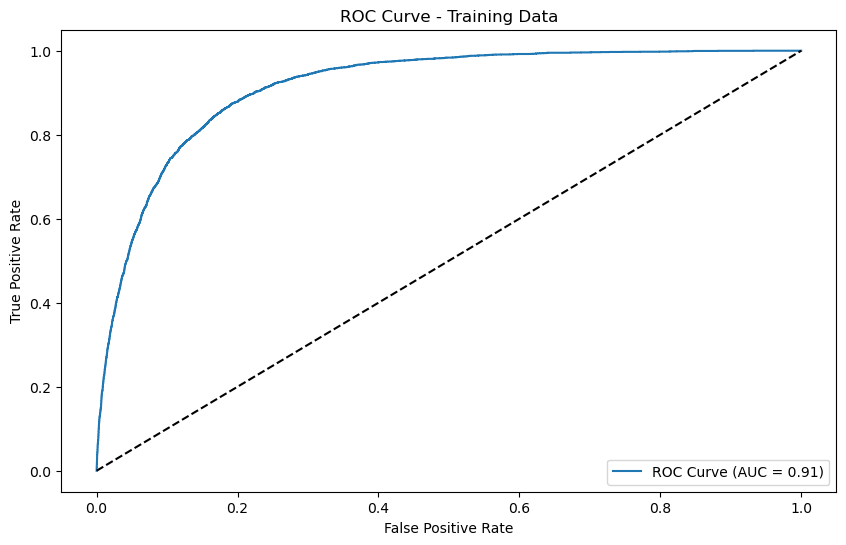

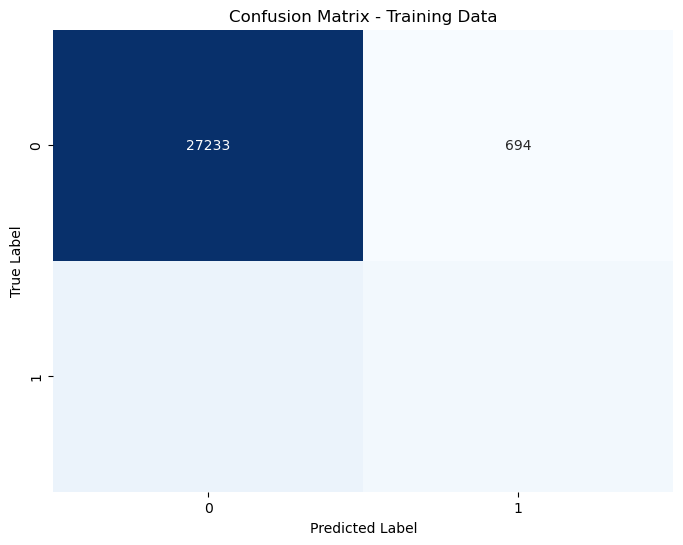

In [14]:
# Neural Network Model
def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model Training
model = create_nn_model(X_train.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

# Save model and training history plots
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.savefig('nn_model_loss.png')

# Predictions on Test Data
y_test_pred = model.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype(int)

# Model Performance Evaluation on Training Data
y_train_pred = model.predict(X_train)
y_train_pred_class = (y_train_pred > 0.5).astype(int)
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc="lower right")
plt.savefig('nn_model_roc_curve.png')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_train, y_train_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Training Data")
plt.savefig('nn_model_confusion_matrix.png')

# Output predictions to CSV for review
test_data['y_pred'] = y_test_pred_class
test_data[['ID', 'y_pred']].to_csv('bank_test_predictions.csv', index=False)
